# Titanic Dataset Analysis

## Import Libraries
In this section, we import all the necessary libraries for data manipulation, visualization, and model building.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## Exploratory Data Analysis (EDA)
In this section, we will explore the dataset to understand what data we have, the types of data, and how many missing values there are. This will help us decide what steps to take for preprocessing and cleaning the data.



In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Check unique values in categorical columns.


In [8]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## Data Visualization

This section includes visualizing the data through various plots to understand the dataset better.

### Distribution of Target Variable (Survived)

Visualize the distribution of the target variable Survived (whether a passenger survived or not) to get an idea of the class balance.

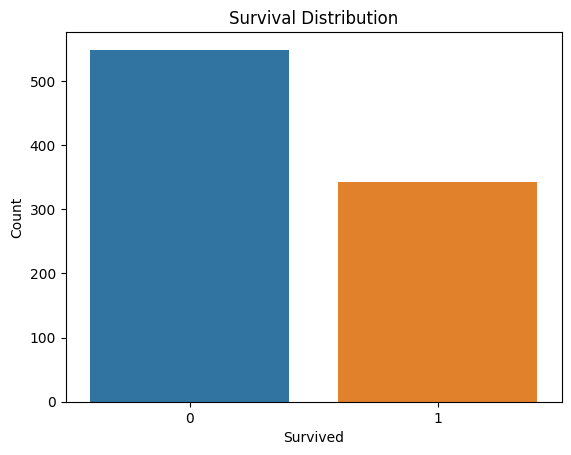

In [11]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### Survival Rate by Gender
It’s interesting to see how the survival rate varies by gender.

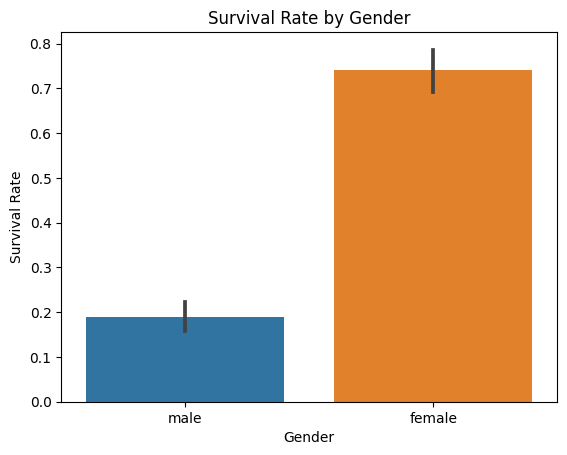

In [12]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

### Survival Rate by Class
Survival rates may differ by passenger class. You can visualize this relationship.

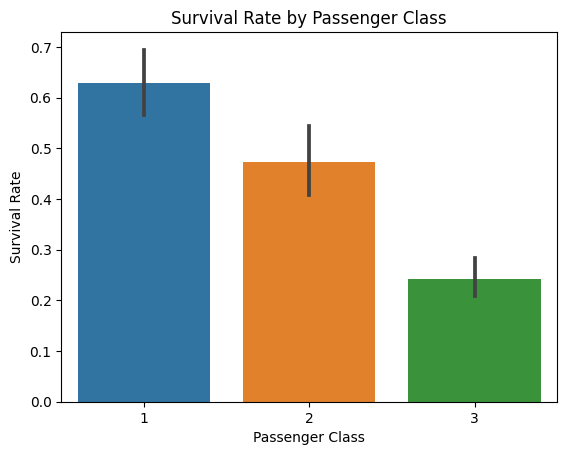

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Survival Rate by SibSp (Siblings/Spouses aboard)

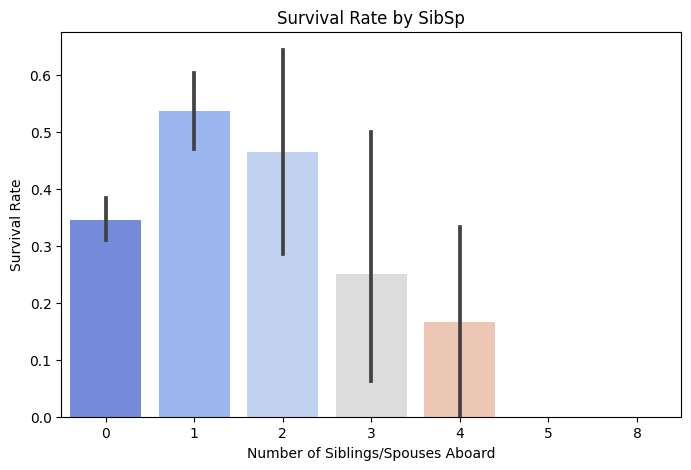

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='SibSp', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()


### Survival Rate by Parch (Parents/Children aboard)

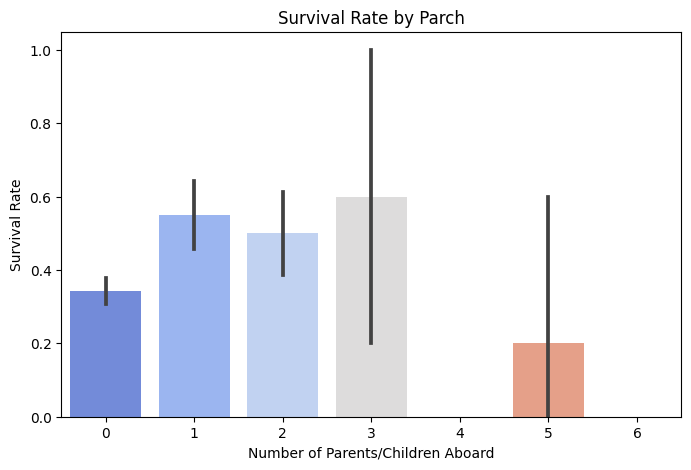

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x='Parch', y='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Rate by Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()

### Fare Distribution by Survival

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


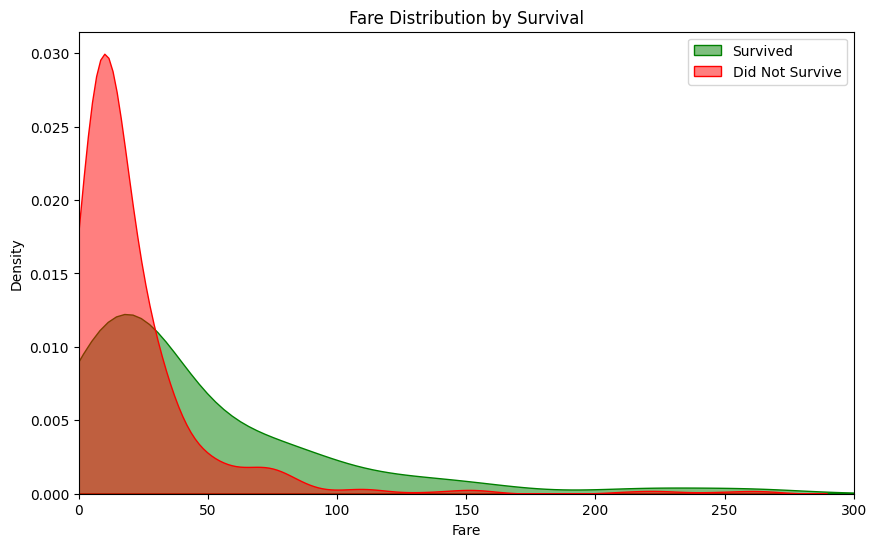

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data[train_data['Survived'] == 1]['Fare'], label='Survived', fill=True, color='green', alpha=0.5)
sns.kdeplot(train_data[train_data['Survived'] == 0]['Fare'], label='Did Not Survive', fill=True, color='red', alpha=0.5)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.xlim(0, 300)  # Limiting outliers for better visualization
plt.legend()
plt.show()

### Age Distribution
Since age is an important feature, it’s useful to see how the ages are distributed in the dataset.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


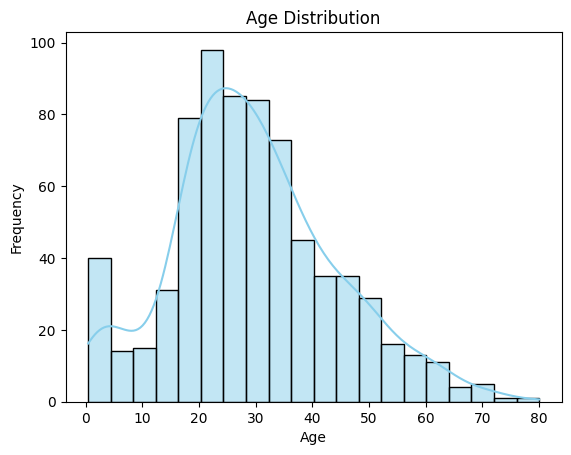

In [17]:
sns.histplot(train_data['Age'].dropna(), kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


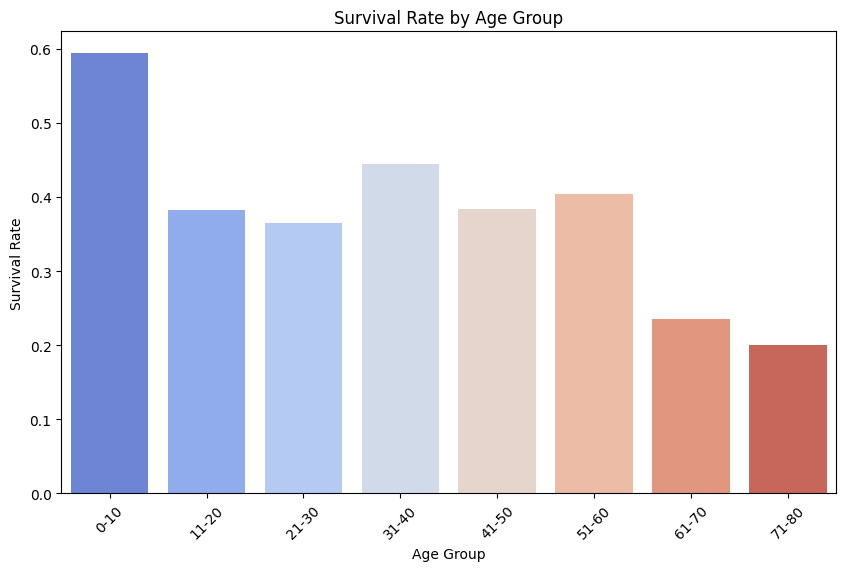

In [18]:
# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column in the DataFrame for age group
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)

# Calculate survival rate by age group
age_group_survival = train_data.groupby('AgeGroup', observed=True)['Survived'].mean().reset_index()

# Plot survival rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_group_survival, palette='coolwarm')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

train_data = train_data.drop(columns=['AgeGroup'])

### Correlation Heatmap
The correlation matrix helps understand how each feature is related to the others. You can plot the correlation heatmap as previously suggested.

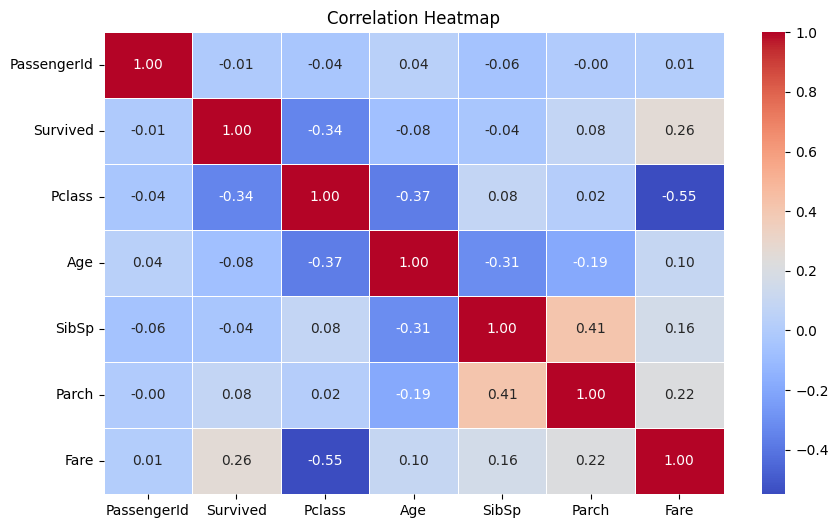

In [19]:
# Drop non-numeric columns that are not needed for correlation
correlation_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked','Sex'])

# Now, we can calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing
Here, we will explore the dataset and handle missing values, as well as any necessary transformations.

In [20]:
def clean_data(data, train_data):
    # Fill missing values in the 'Age' column with the median from the training set
    data['Age'] = data['Age'].fillna(train_data['Age'].median())  # Use the median from the training set
    
    # Fill missing values in the 'Age' column with the median from the training set
    data['Fare'] = data['Fare'].fillna(train_data['Fare'].median())  # Use the median from the training set
    
    # Fill missing values in 'Embarked' with the most frequent value (mode) from the training set
    data['Embarked'] = data['Embarked'].fillna(train_data['Embarked'].mode()[0])

    # Map 'Sex' to numeric values (male = 0, female = 1)
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

    # One-Hot Encoding for 'Embarked' in the test data
    embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')

    # Concatenate the new columns
    data = pd.concat([data, embarked_dummies], axis=1)
    
    data = data.drop(columns=['Name', 'Ticket', 'Embarked','Cabin','PassengerId'])

    # Return the cleaned data
    return data

In [21]:
test_ids = test_data["PassengerId"]

# Clean the training and test data using the function
train_data_cleaned = clean_data(train_data, train_data)
test_data_cleaned = clean_data(test_data, train_data)

X = train_data_cleaned.drop(columns=['Survived'])
y = train_data_cleaned['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building and Evaluation
Here we will build machine learning models and evaluate their performance.

### Logistic Regression

In [22]:
from sklearn.model_selection import GridSearchCV

# Apply scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Regularization type
    'solver': ['lbfgs', 'liblinear', 'saga']  # Different solvers
}

# Logistic Regression Model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Grid Search for best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best params
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_scaled, y_train)

# Evaluate the model
logreg_preds = best_logreg.predict(X_train_scaled)
logreg_accuracy = accuracy_score(y_train, logreg_preds)
print(f"Optimized Logistic Regression Accuracy: {logreg_accuracy:.4f}")


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Optimized Logistic Regression Accuracy: 0.8202


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

### Random Forest Model

In [23]:
# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 300, 500],         # Number of trees
    'max_depth': [None, 10, 20, 30],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples in leaves
    'max_features': ['sqrt', 'log2', None],        # Number of features considered at each split
    'bootstrap': [True, False]                     # Whether bootstrap sampling is used
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Apply Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of combinations to try
    cv=5,       # Cross-validation (5 folds)
    verbose=2,  
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Train the search
rf_random.fit(X_train, y_train)

# View the best hyperparameters found
print("Best hyperparameters:", rf_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


In [24]:
# Define the refined search grid
param_grid = {
    'n_estimators': [rf_random.best_params_['n_estimators'] - 100, rf_random.best_params_['n_estimators'], rf_random.best_params_['n_estimators'] + 100],
    'max_depth': [rf_random.best_params_['max_depth'] - 5, rf_random.best_params_['max_depth'], rf_random.best_params_['max_depth'] + 5],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 1, rf_random.best_params_['min_samples_split'], rf_random.best_params_['min_samples_split'] + 1],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'] - 1, rf_random.best_params_['min_samples_leaf'], rf_random.best_params_['min_samples_leaf'] + 1],
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Apply Grid Search
rf_grid = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=5,
    verbose=2,  
    n_jobs=-1
)

# Train the search
rf_grid.fit(X_train, y_train)

# View the best hyperparameters found
print("Best hyperparameters:", rf_grid.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [25]:
# Train the model with the best hyperparameters found
best_rf = rf_grid.best_estimator_  # If you used GridSearchCV

# Predictions on the training set
rf_preds = best_rf.predict(X_train)

# Evaluate the model
rf_accuracy = accuracy_score(y_train, rf_preds)
print(f"Random Forest Accuracy with Best Hyperparameters: {rf_accuracy:.4f}")

Random Forest Accuracy with Best Hyperparameters: 0.8694


### Support Vector Machine (SVM)

In [26]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
svm_grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Best model found
best_svm = svm_grid.best_estimator_
print(f"Best SVM Parameters: {svm_grid.best_params_}")

# Evaluate the optimized model
svm_preds = best_svm.predict(X_train)
svm_accuracy = accuracy_score(y_train, svm_preds)
print(f"SVM Accuracy with Best Hyperparameters: {svm_accuracy:.4f}")

Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy with Best Hyperparameters: 0.7879


### Model Comparison

In [27]:
# Display the accuracy of the three models
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Create a dictionary to store models and their accuracies
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'SVM': svm_accuracy,
    'Random Forest': rf_accuracy
}

# Find the model with the highest accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)  # This returns the model with the highest accuracy
best_accuracy = model_accuracies[best_model_name]

# Print the best model and its accuracy
print(f"The best model is {best_model_name} with accuracy: {best_accuracy:.4f}")

# Now, define the best model based on the best accuracy
if best_model_name == 'Logistic Regression':
    best_model = best_logreg
    best_model.fit(X_train_scaled, y_train)  # Fit the Logistic Regression model on scaled data
elif best_model_name == 'Random Forest':
    best_model = best_rf
    best_model.fit(X_train, y_train)  # Fit the Random Forest model on the original data
else:
    best_model = best_svm
    best_model.fit(X_train, y_train)  # Fit the SVM model on the original data

Logistic Regression Accuracy: 0.8202
SVM Accuracy: 0.7879
Random Forest Accuracy: 0.8694
The best model is Random Forest with accuracy: 0.8694


## Test Model

In [30]:
# Ensure that the columns in the test set match the training set (excluding 'Survived')
X_test = test_data_cleaned.reindex(columns=X_train.columns)

# Apply feature scaling only if the best model is Logistic Regression
if best_model_name == 'Logistic Regression':
    X_test_scaled = scaler.transform(X_test)
    test_preds = best_model.predict(X_test_scaled)
else:
    test_preds = best_model.predict(X_test)

# Create a DataFrame with the prediction results
results = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': test_preds
})

# Save the results to a CSV file
results.to_csv('titanic_predictions.csv', index=False)
print("Predictions saved to 'titanic_predictions.csv'")

Predictions saved to 'titanic_predictions.csv'


In [31]:
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


To improve:


* Use the median for imputing null values in 'Age'; it's better to impute with a prediction model.
* Analyze the meaning of the values in 'Cabin' more deeply.
* Use an XGBoost model or a more advanced model.
